In [27]:
# user inputs
symbol = "SBIN"
series = "EQ"
yr = 5 # number of years of data
k = 20 # differencing
n = 50 # moving average

In [2]:
# import packages
import pandas as pd
import datetime as dt
from nsepython import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
# get latest data
this_data = pd.DataFrame()
end_date = dt.date.today()

for i in range(yr):
    start_date = end_date - dt.timedelta(days = 364)
    this_data = pd.concat([equity_history(symbol,series,start_date.strftime("%d-%m-%Y"),end_date.strftime("%d-%m-%Y")), this_data])
    end_date = start_date - dt.timedelta(days = 1)

In [4]:
# UDF k -diff
def get_k_diff(x, k):
    for i in range(k):
        x = x.diff()
    return x

In [28]:
# create differences
this_stock_data = this_data[['CH_TIMESTAMP', 'CH_CLOSING_PRICE']].set_index('CH_TIMESTAMP')
this_stock_data.sort_values(by='CH_TIMESTAMP', axis=0, ascending=True, inplace=True)
this_stock_data['SMA_'+ str(n)] = this_stock_data['CH_CLOSING_PRICE'].rolling(n).mean()
this_stock_data['DIFF_'+ str(k)] = get_k_diff(this_stock_data['CH_CLOSING_PRICE'], k)

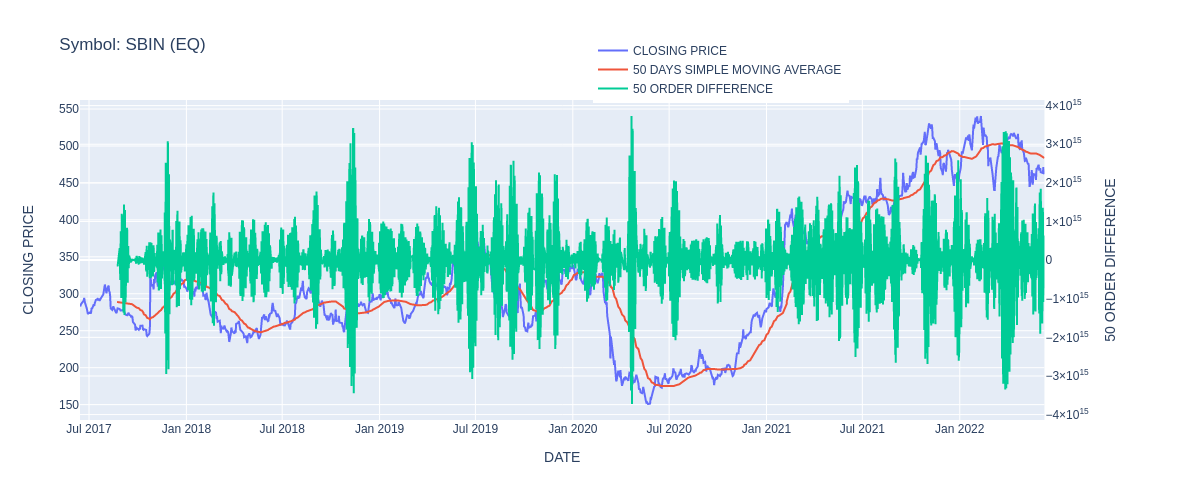

In [34]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=this_stock_data.index, y=this_stock_data['CH_CLOSING_PRICE'], name="CLOSING PRICE"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=this_stock_data.index, y=this_stock_data['SMA_'+ str(n)], name=str(n) + " DAYS SIMPLE MOVING AVERAGE"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=this_stock_data.index, y=this_stock_data['DIFF_'+ str(k)], name=str(k) + " ORDER DIFFERENCE"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Symbol: " + symbol + " (" + series + ")",
    legend=dict(yanchor="top", y=1.2, xanchor="left", x=0.5),
    autosize=False,
    width=1100,
    height=500
)

# Set x-axis title
fig.update_xaxes(title_text="DATE")

# Set y-axes titles
fig.update_yaxes(title_text="CLOSING PRICE", secondary_y=False)
fig.update_yaxes(title_text=str(k) + " ORDER DIFFERENCE", secondary_y=True)

fig.show()